# Experiment: KNN on iris dataset

## 👥 Quick Summary

**Goal:** Classify iris flowers by comparing each point to its nearest labeled neighbors.

---

### 🧠 Core Idea:
- Use **distance to neighbors** to predict the label.
- Majority vote from `k` closest points in training data.
- No training—**lazy learning**: compute everything at prediction time.

---

### 🧮 Example Configuration:
- `n_neighbors=5`
- `weights='uniform'` *(all neighbors equal)*
- `metric='minkowski'` *(default distance)*

---

### 🔧 Implications:

| Aspect          | Expectation       | Notes                                             |
|-----------------|-------------------|---------------------------------------------------|
| Accuracy        | High              | Simple but effective for small, clean datasets.   |
| Overfitting     | Low to Moderate   | Depends on `k`; small `k` may overfit.            |
| Training Time   | Instantaneous     | No training phase; just store the dataset.        |
| Prediction Time | **Slower**        | Must compute distance to all training samples.    |
| Interpretability| Low               | No model structure to inspect.                    |

---

### 🔑 Characteristics:
- Great baseline algorithm.
- Sensitive to feature scaling.
- Struggles with high dimensions or large datasets or things without an easy distance metric.

## Setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# experiment helper imports
from helpers.base_imports import *

In [ ]:
notes, X_train, X_test, y_train, y_test, target_names = get_dataset(
    "iris-20test-shuffled-v1"
)
print(notes)
print(target_names)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Dataset: iris-20test-shuffled-v1
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)
Train: 80.00% of total
Test: 20.00% of total
Notes: None
Created by save_dataset() helper at 2024-07-09 12:28:10

  target_names
0       setosa
1   versicolor
2    virginica


((120, 4), (30, 4), (120, 1), (30, 1))

## Optimize hyperparameters

Even though there is no "learning" persay, KNN uses k (# of neighbors) during prediction to decide how many neighbors to consider and thats worth optimizing. 

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

param_grid = {"kneighborsclassifier__n_neighbors": list(range(1, 31))}

grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3

Best k: {'kneighborsclassifier__n_neighbors': 12}
Best cross-val accuracy: 0.9583333333333334


/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3

Note: We could also optimize for `cv` and for the distance metric if we wanted.

In [ ]:
model = make_pipeline(
    StandardScaler(),  # KNN is HIIGHLY sensitive to feature scaling since it uses distance calcs!
    KNeighborsClassifier(n_neighbors=12),  # using the best k from grid search
)

In [7]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

target_names       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix')

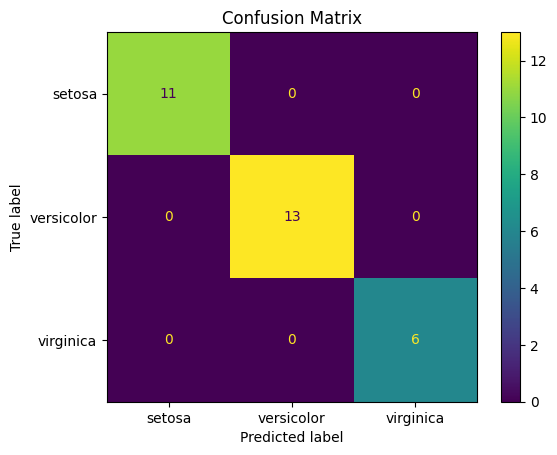

In [ ]:
# Get target labels as list
target_names_list = target_names["target_names"].tolist()

# Generate confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Display and save
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_list)
cmd.plot()
plt.title("Confusion Matrix")
# plt.savefig(f"{FIGS_DIR}/{exp.name}_confusion-matrix.png")

We can also visualize the KNN decision boundary. We pick 2 features (or 3 if you want to visualize in 3D) and plot the decision boundary for each value of k. 

This shows a visual slice of how KNN is classifying the data for each value of k. 

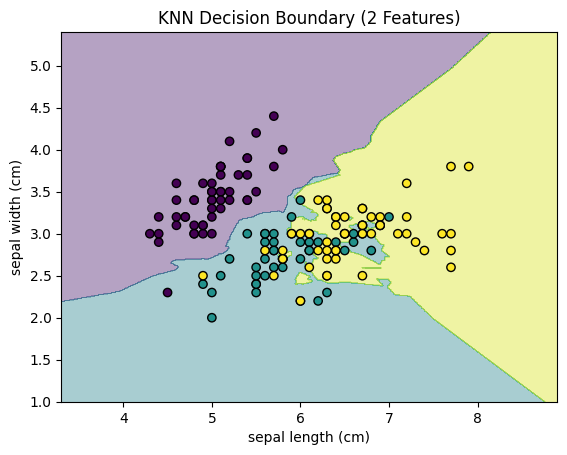

In [17]:
# generallize KNN DB for 2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

# Load and select 2 features for 2D plot
iris = load_iris()
X = iris.data[:, :2]  # Just first 2 features
y = iris.target

# Create a pipeline with scaling + KNN
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
model.fit(X, y)

# Create meshgrid for decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Decision Boundary (2 Features)")
plt.show()